<a href="https://colab.research.google.com/github/me-smishra27/Ted-Talks-Views-Prediction/blob/main/First_Commit_Ted_Talk_Views_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

#IMPORT DATA

In [21]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/Capstone 3-Ted_Talk_Views_Prediction/data_ted_talks.csv'
r_data = pd.read_csv(filepath)

In [22]:
r_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


#Duplicated Value


In [23]:
r_data.duplicated().sum()

0

#KNOWING DATA 

In [24]:
r_data.shape

(4005, 19)

In [25]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [26]:
r_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

#MISSING DATA

In [27]:
r_data.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

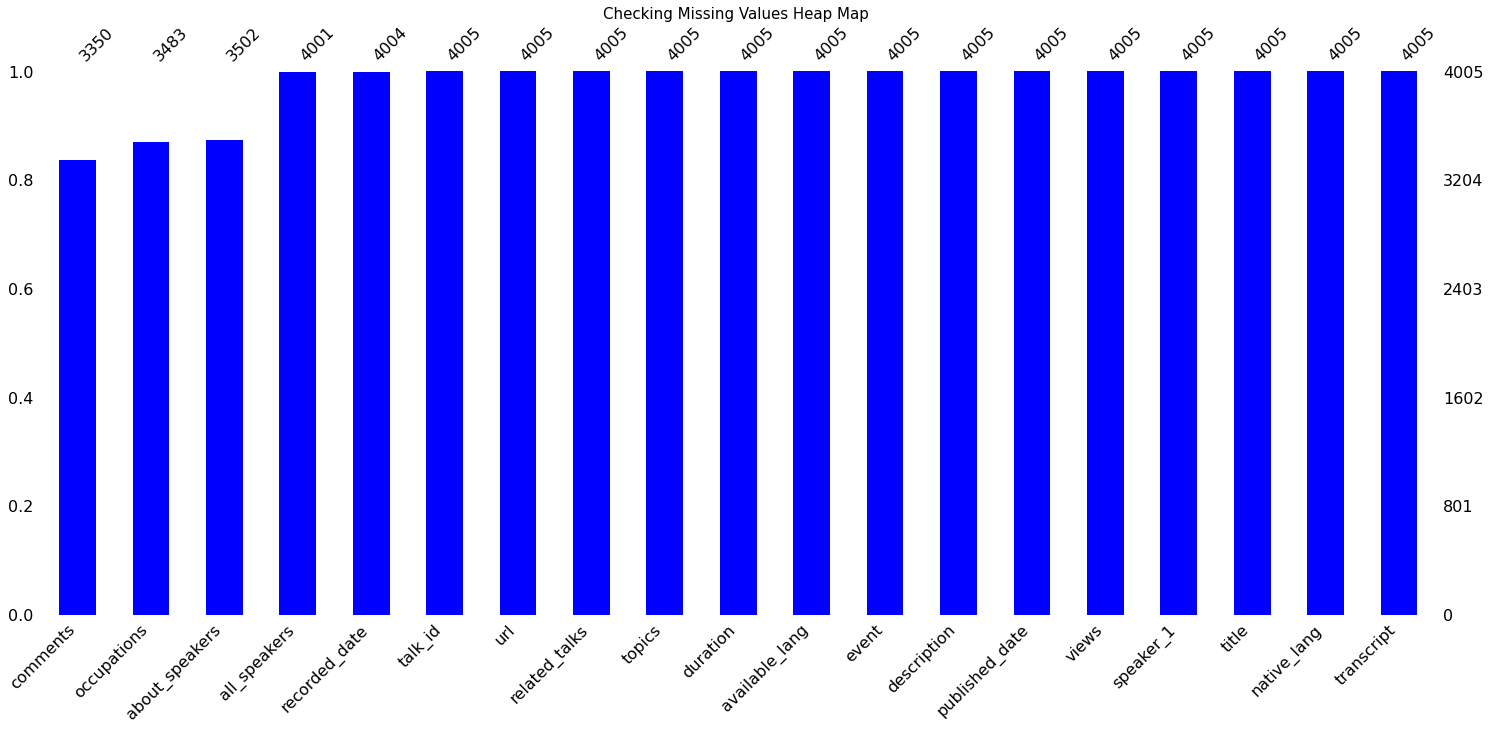

In [28]:
mno.bar(r_data.iloc[:, :],
        color = 'blue',
        sort = 'ascending')
plt.title('Checking Missing Values Heap Map ', fontsize = 15)
plt.show()

#COPIED DATA / SET INDEX

In [29]:
set_data = r_data.copy()

In [30]:
set_data.set_index('talk_id', inplace = True)

In [31]:
set_data.head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


#Title_Analysis

In [32]:
set_data['title'].nunique()

4005

#Speaker_1 Analaysis

In [33]:
set_data['speaker_1'].nunique()

3274

In [34]:
speaker_count = set_data['speaker_1'].value_counts().to_frame()
df_speaker_count = pd.DataFrame(speaker_count)
df_speaker_count = df_speaker_count.reset_index()
df_speaker_count.columns = ['Speaker_name', 'talks_delivered']

In [35]:
most_talks = df_speaker_count.nlargest(20, 'talks_delivered')

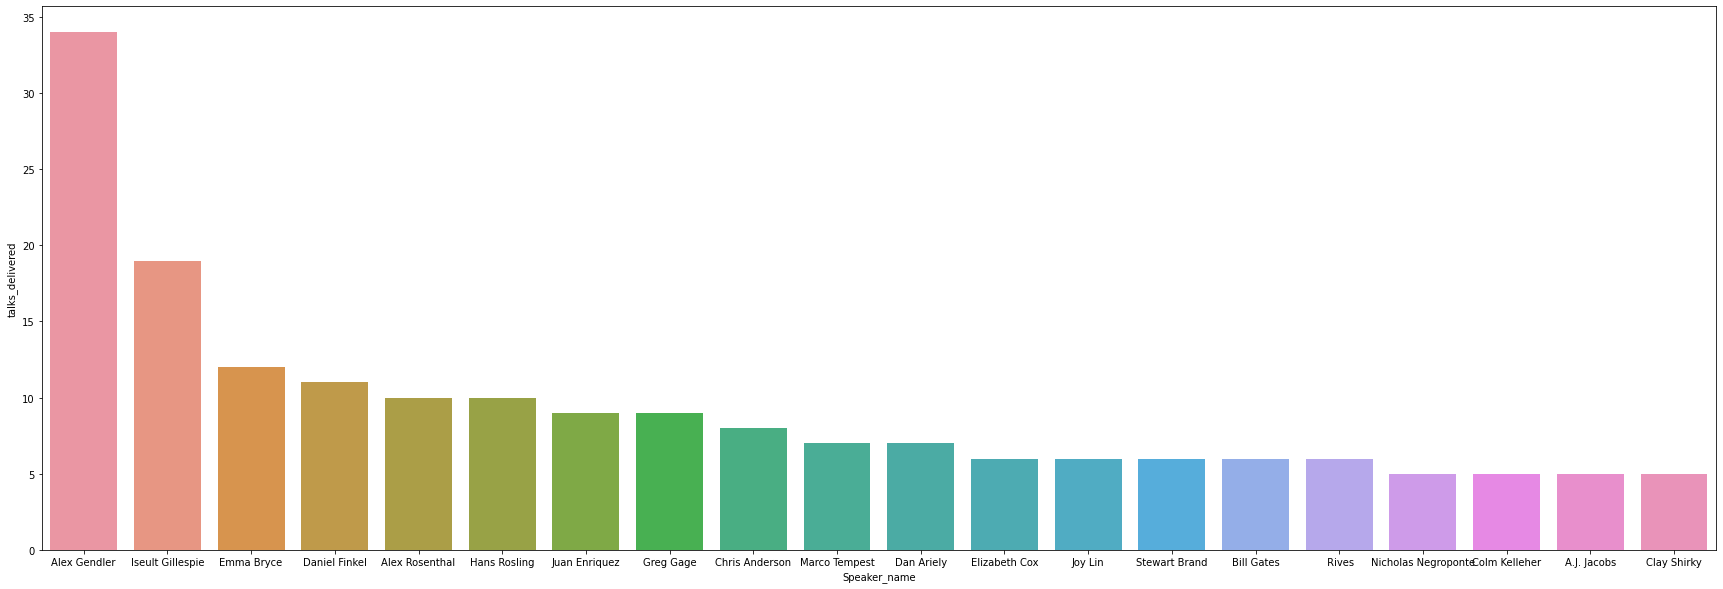

In [36]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

CONCLUSION
*   The max number of talk is delivered by Alex Gendler followed by the rest.



#all_speakers analysis 

In [37]:
set_data['all_speakers'].value_counts()

{0: 'Alex Gendler'}             34
{0: 'Iseult Gillespie'}         19
{0: 'Emma Bryce'}               12
{0: 'Daniel Finkel'}            11
{0: 'Alex Rosenthal'}           10
                                ..
{0: 'Iqbal Quadir'}              1
{0: 'Natasha Hurley-Walker'}     1
{0: 'Jonathan Butterworth'}      1
{0: 'Nancy Etcoff'}              1
{0: 'Rajesh Rao'}                1
Name: all_speakers, Length: 3306, dtype: int64

In [38]:
set_data['speaker_1'].value_counts()

Alex Gendler          34
Iseult Gillespie      19
Emma Bryce            12
Daniel Finkel         11
Alex Rosenthal        10
                      ..
Shannon Lee            1
Amber L Stuver         1
Jordan Wirfs-Brock     1
Tomas Chor             1
Ingrid Fetell Lee      1
Name: speaker_1, Length: 3274, dtype: int64

*   We can easily drop the 'all_speakers' columns as the speaker name is already mentioned in speaker_1.

In [39]:
set_data.drop(['all_speakers'], axis = 1, inplace = True)

In [40]:
set_data.head()

,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
53,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
66,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


#MAX VIEWS WITH SPEAKER

In [41]:
sp_view_df = set_data.nlargest(20, 'views')

In [42]:
sp_view_df[['speaker_1', 'views']]

,speaker_1,views
talk_id,,
66,Sir Ken Robinson,65051954
1569,Amy Cuddy,57074270
2405,James Veitch,56932551
848,Simon Sinek,49730580
1042,Brené Brown,47544833
2034,Julian Treasure,41504331
2458,Tim Urban,37976820
1647,Cameron Russell,33874546
13587,Sam Berns,33691484


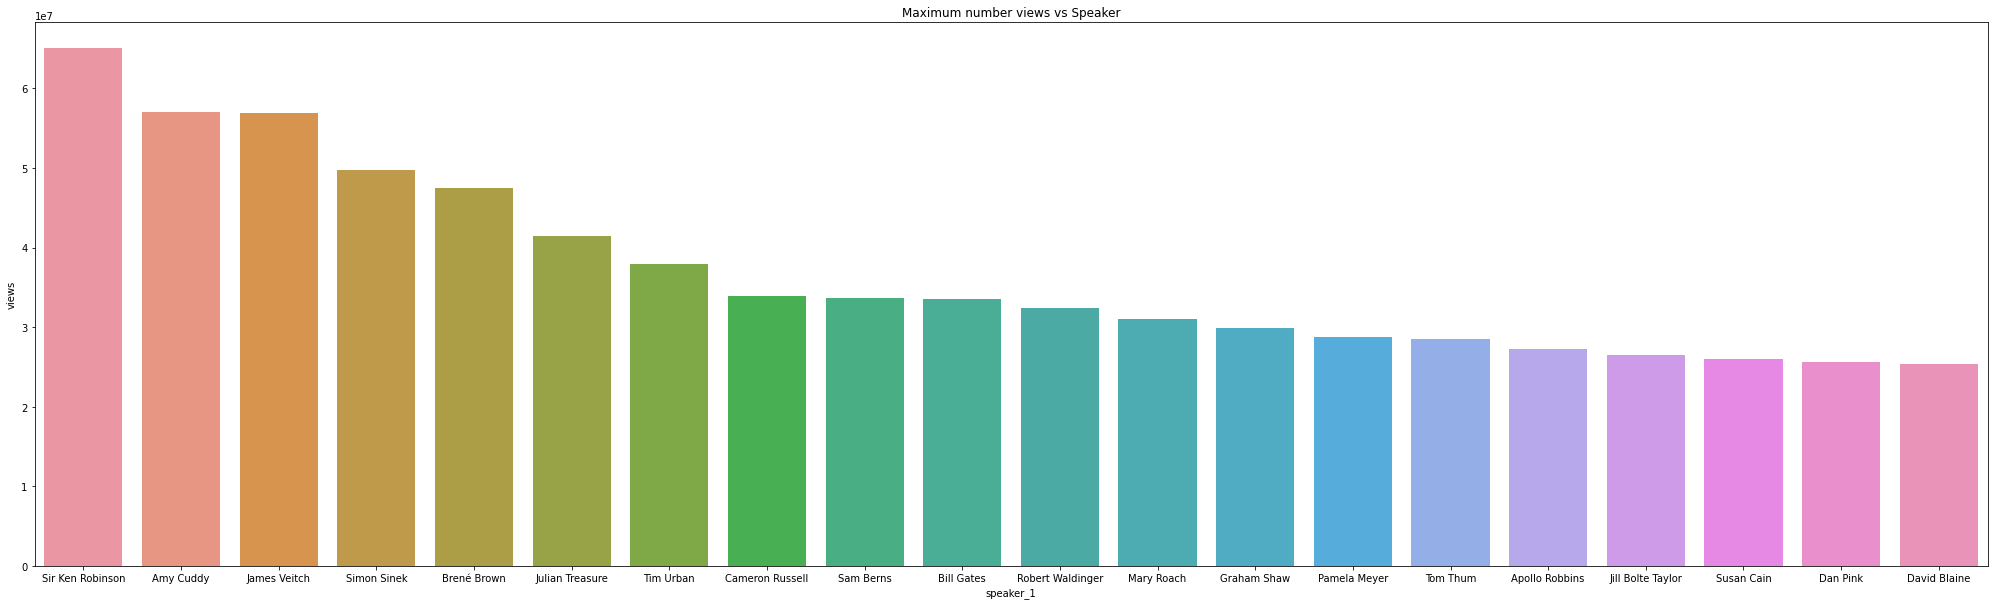

In [43]:
plt.figure(figsize=(35,10))
plt.title('Maximum number views vs Speaker')
sns.barplot(x = 'speaker_1', y = 'views', data = sp_view_df )

#Speaker with total Views

In [47]:
sp_tv = set_data.groupby('speaker_1').agg({'views' : 'sum'})
stv_res = sp_tv.nlargest(20, 'views')
stv_res.reset_index(inplace = True)

In [48]:
stv_res

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


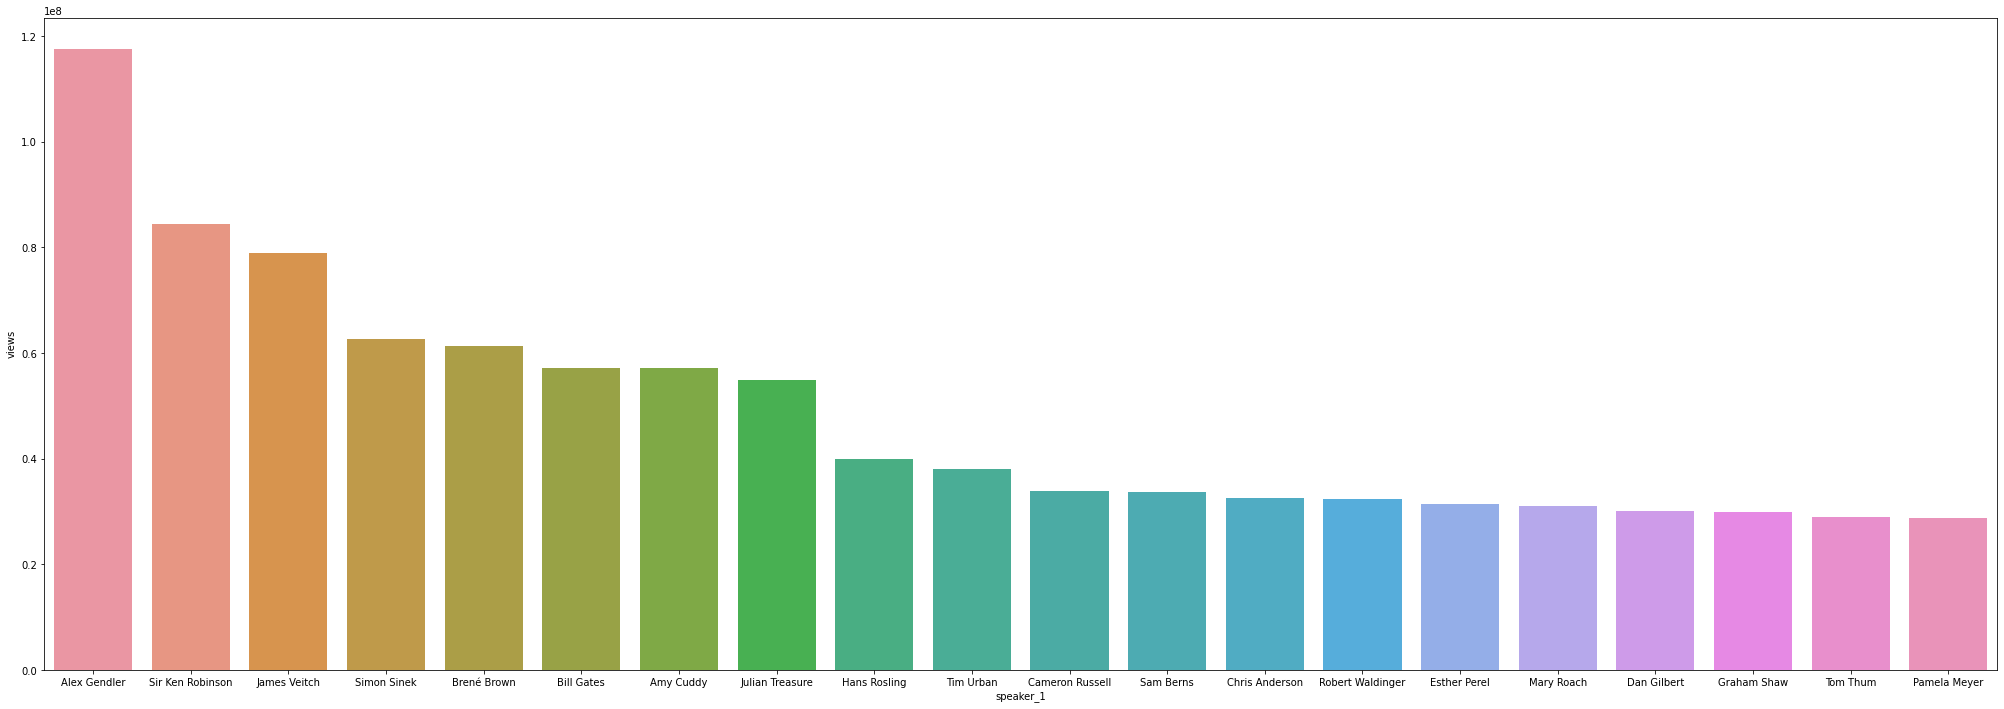

In [49]:
plt.figure(figsize=(35, 12))
sns.barplot(x ='speaker_1', y='views', data=stv_res )